In [1]:
import cv2 
import matplotlib.pyplot as plt 


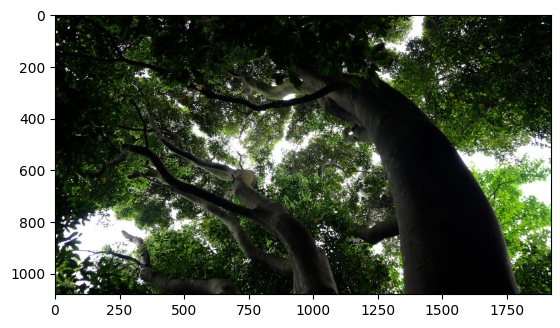

In [5]:
img1 = cv2.imread('/home/kkyu/amr_ws/opencv/data/tree.bmp')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

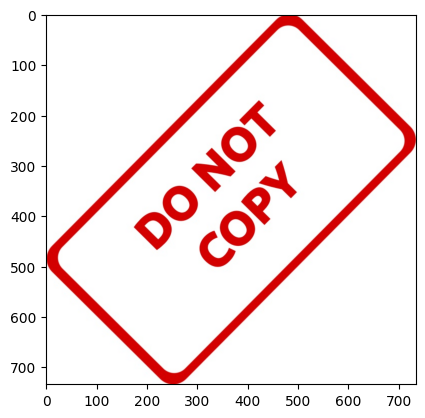

In [6]:
img2 = cv2.imread('/home/kkyu/amr_ws/opencv/data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [8]:
img1.shape , img2.shape

((1080, 1920, 3), (734, 734, 3))

- 두 개의 이미지 사이즈가 다르므로 같게 만들기 

In [9]:
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img1.shape, img2.shape

((1080, 1920, 3), (1080, 1920, 3))

### 가중치 합, 평균 연산 - cv2.addWeighted
- 덧셈 연산을 할 시에 많은 부분이 흰색으로 나옵니다.
- 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 가중합을 계산하여 결과 영상의 픽셀 값으로 설정합니다.
- 각각의 영상에 가중치를 곱하여 더해주면 두 입력 영상의 평균 밝기를 유지할 수 있습니다.

$$
\text{dst} = \alpha \cdot \text{src1} + \beta \cdot \text{src2} + \gamma
$$

$$
\alpha + \beta = 1, \quad 0 \leq \alpha, \beta \leq 1
$$



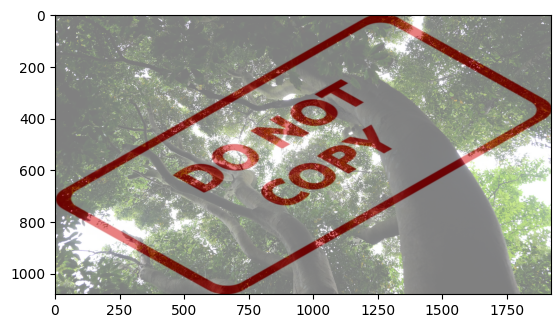

In [10]:
blended = cv2.addWeighted(src1 = img1, alpha = 0.5, src2 = img2 , beta = 0.5, gamma = 0)
plt.imshow(blended)

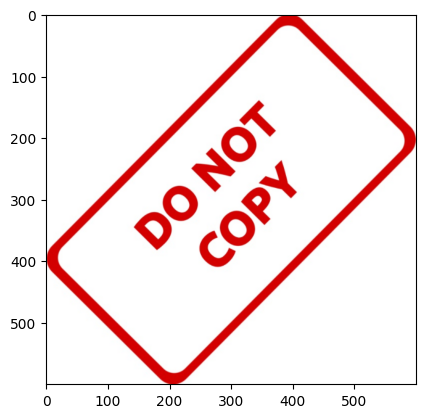

In [11]:
img2 = cv2.resize(img2, (600,600))
plt.imshow(img2)

- offset 작업

In [13]:
large_img = img1 
small_img = img2 

x_offset = 0 
y_offset = 0

- fixel 교체

In [16]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img

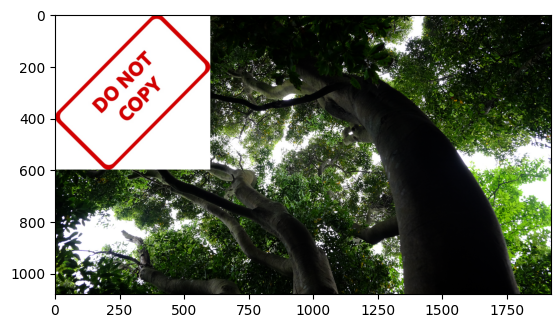

In [17]:
plt.imshow(large_img)

### 워터마크

In [18]:
img1 = cv2.imread('/home/kkyu/amr_ws/opencv/data/tree.bmp')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/home/kkyu/amr_ws/opencv/data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (600,600))

img1.shape, img2.shape

((1080, 1920, 3), (600, 600, 3))

In [19]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]
x_offset, y_offset 

(1320, 480)

### ROI
- Region of Interest, 관심 영역
- 영상에서 특정 연산을 수행하고자 하는 임의의 부분 영역

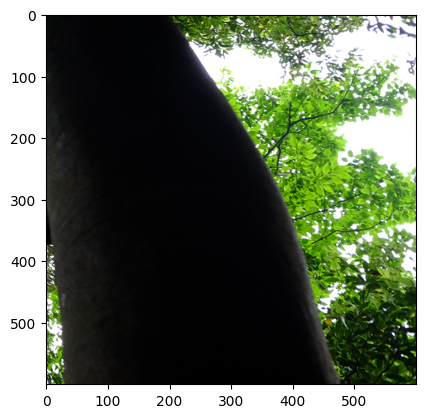

In [22]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]
plt.imshow(roi)

- Gray에서는 255가 흰색, 0이 검은색

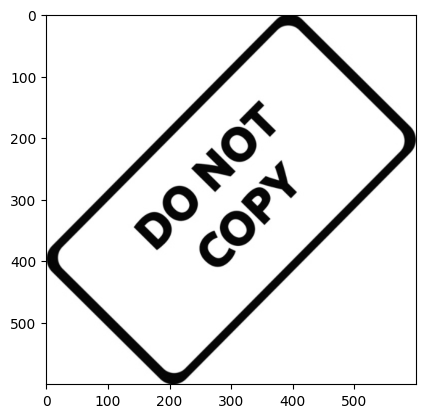

In [23]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap = 'gray')

- 관계 뒤집기

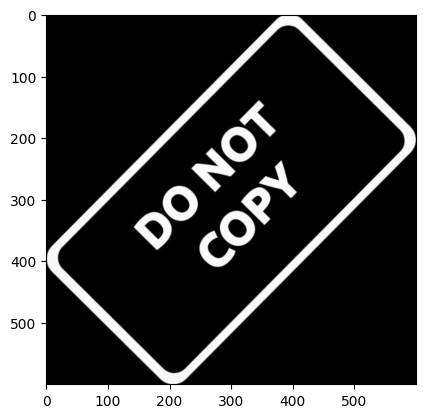

In [24]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv, cmap = 'gray')

In [25]:
mask_inv.shape

(600, 600)

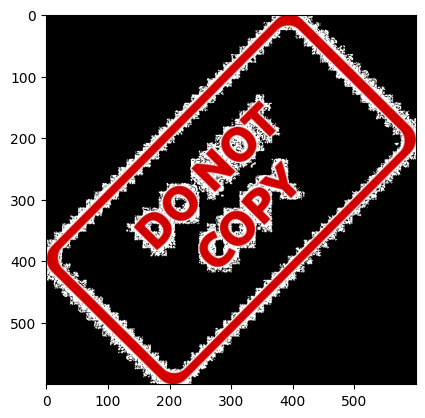

In [30]:
fg = cv2.bitwise_or(img2, img2, mask = mask_inv)
plt.imshow(fg)

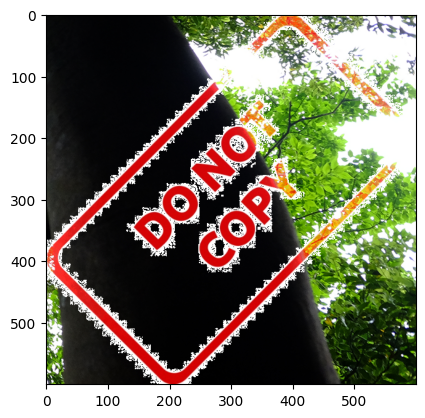

In [31]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

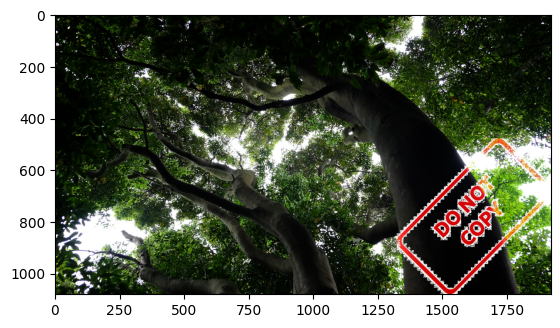

In [32]:
img1[y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]] = final_roi
plt.imshow(img1)

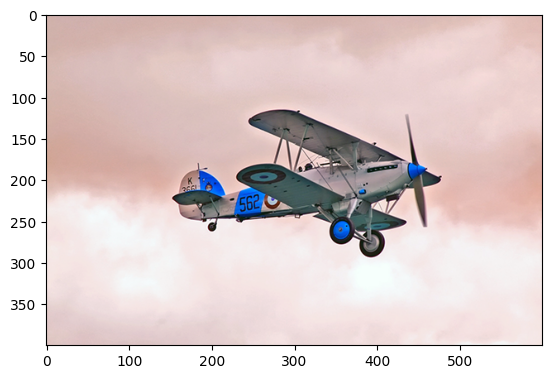

In [3]:
import cv2 
import matplotlib.pyplot as plt 

src = cv2.imread('/home/kkyu/amr_ws/opencv/data/airplane.bmp', cv2.IMREAD_COLOR)
plt.imshow(src)

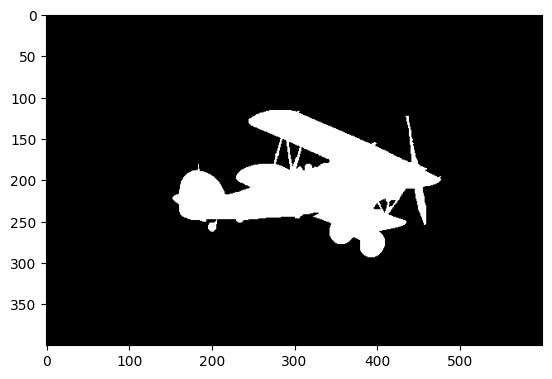

In [4]:
mask = cv2.imread('/home/kkyu/amr_ws/opencv/data/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(mask, cmap = 'gray')

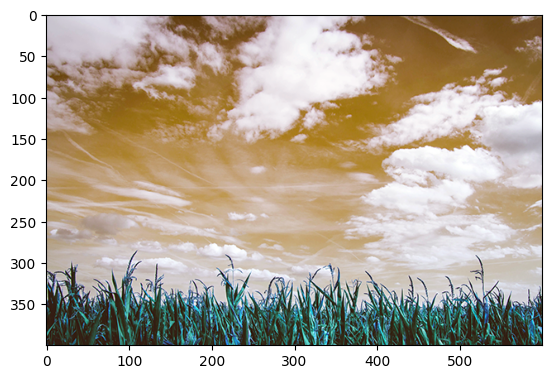

In [5]:
dst = cv2.imread('/home/kkyu/amr_ws/opencv/data/field.bmp', cv2.IMREAD_COLOR)
plt.imshow(dst)

### cv2.copyTo(src, mask, dst = None) -> dst

- src : 입력 영상
- mask : 마스크 영상, 0이 아닌 픽셀에 대해서만 복사 연산을 수행
- dst : 출력 영상, 만약 src와 크기 및 타입이 같은 dst를 입력으로 지정하면 dst를 새로 생성하지 않고 연산을 수행 
    - 그렇지 않으면 dst를 새로 생성하여 연산을 수행한 후 반환함 

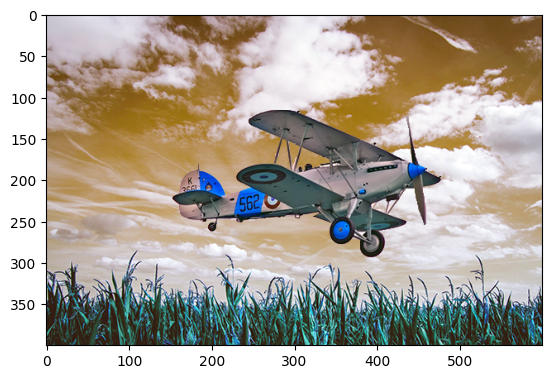

In [6]:
plt.imshow(cv2.copyTo(src, mask, dst))